In [1]:
import megatron as me
from scipy.sparse import load_npz
import time

In [2]:
me.__version__

'0.1a'

In [3]:
workdir = 'result_celltagging'
me.settings.set_workdir(workdir)

Saving results in: result_celltagging


In [4]:
me.settings.set_figure_params(dpi=80,
                              style='white',
                              fig_size=[5,5],
                              rc={'image.cmap': 'viridis'})

In [5]:
adata = me.read_h5ad('rnaseq_biddy18.h5ad')
adata

AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    obsm: 'X_tsne_paper'

In [6]:
mat_clone = load_npz('clone_traj_biddy18.npz')
mat_clone

<18076x1890 sparse matrix of type '<class 'numpy.int64'>'
	with 33901 stored elements in Compressed Sparse Row format>

In [7]:
me.pp.add_clones(adata, 
                 mat=mat_clone)
adata

AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone'
    obsm: 'X_tsne_paper', 'X_clone'

In [8]:
me.pp.filter_clones(adata,min_cells=1)
adata

Before filtering: 1890 clones
After filtering: 1890 clones


AnnData object with n_obs × n_vars = 18076 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone'
    obsm: 'X_tsne_paper', 'X_clone'

In [9]:
adata.obs['Cluster.Seurat'] = adata.obs['Cluster.Seurat'].astype(str)

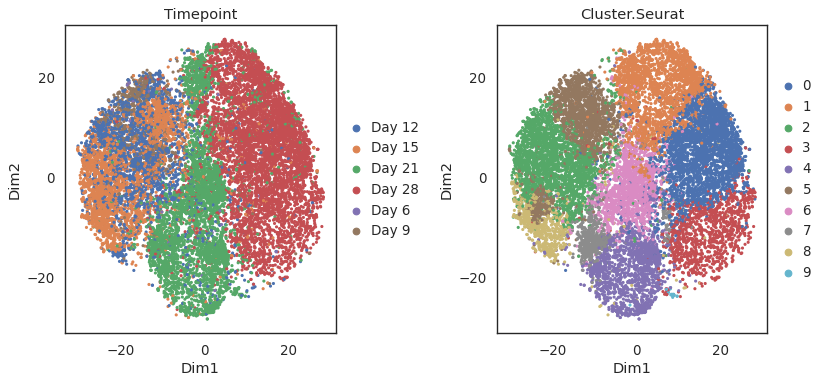

In [10]:
me.pl.scatter(adata, 
              color=['Timepoint','Cluster.Seurat'],
              drawing_order='random',
              obsm='X_tsne_paper')

In [11]:
%%time
me.tl.clone_distance(adata,
                     method='geodesic',
                     obsm='X_tsne_paper',
                     anno_time='Day',
                     n_jobs=20)

Finished: 4.502087950706482 mins


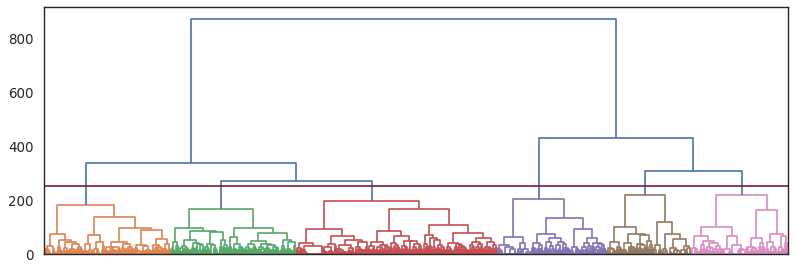

In [12]:
me.pl.clone_dendrogram(adata, color_threshold=250)

In [13]:
me.tl.cluster_clones(adata,
                     n_clusters=6,
                     method='hierarchical')

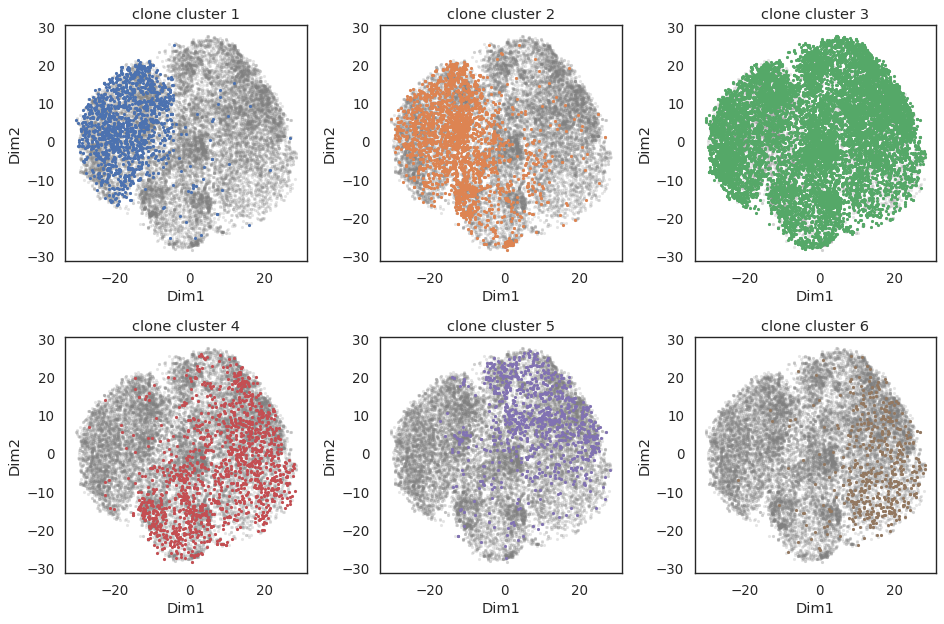

In [14]:
me.pl.clone_clusters(adata, group='hierarchical', obsm='X_tsne_paper',
                    show_contour=False, 
                    levels=5, thresh=0.1,fig_ncol=3, alpha=1)

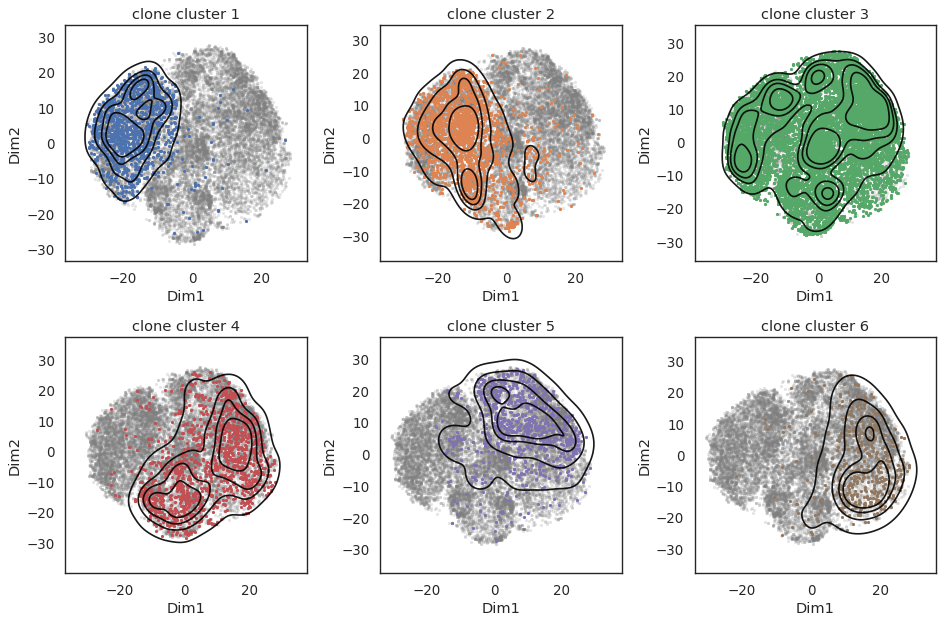

In [15]:
me.pl.clone_clusters(adata, group='hierarchical', obsm='X_tsne_paper',show_contour=True, 
                     levels=5, thresh=0.1,fig_ncol=3, alpha=1)

In [16]:
adata.uns['clone']['anno'].head()

,hierarchical
0,1
1,1
2,6
3,1
4,1


### analysis for cluster 3

```python
import numpy as np
id_clones_x = adata.uns['clone']['anno'][adata.uns['clone']['anno']['hierarchical'] == '3'].index.astype(int)
id_cells_x = np.where(adata.obsm['X_clone'][:, id_clones_x].sum(axis=1).A1>0)[0]
adata_subset = adata[id_cells_x,].copy()
mat_clone_subset = mat_clone[id_cells_x,:][:,id_clones_x].copy()
me.pp.add_clones(adata_subset, 
                 mat=mat_clone_subset)
```

In [17]:
adata_subset = me.tl.subset_clones(adata, anno_value=['3'])
adata_subset

AnnData object with n_obs × n_vars = 12346 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone', 'color'
    obsm: 'X_tsne_paper', 'X_clone'

In [18]:
me.pp.filter_clones(adata_subset,min_cells=10)
adata_subset

Before filtering: 510 clones
After filtering: 354 clones


AnnData object with n_obs × n_vars = 12346 × 28001
    obs: 'nGene', 'nUMI', 'CellCycle', 'percent.mito', 'Replicate', 'Day', 'Timepoint', 'Reprogramming.Day', 'Outcome', 'Cluster.Seurat', 'State.Monocle', 'CellType.Monocle', 'Pseudotime.Monocle', 'Selected.Clones', 'CellTag.Version', 'Seurat', 'Monocle', 'Tag_0', 'Tag_3', 'Tag_13', 'tSNE_1', 'tSNE_2', 'Component.1', 'Component.2'
    var: 'symbol'
    uns: 'clone', 'color'
    obsm: 'X_tsne_paper', 'X_clone'

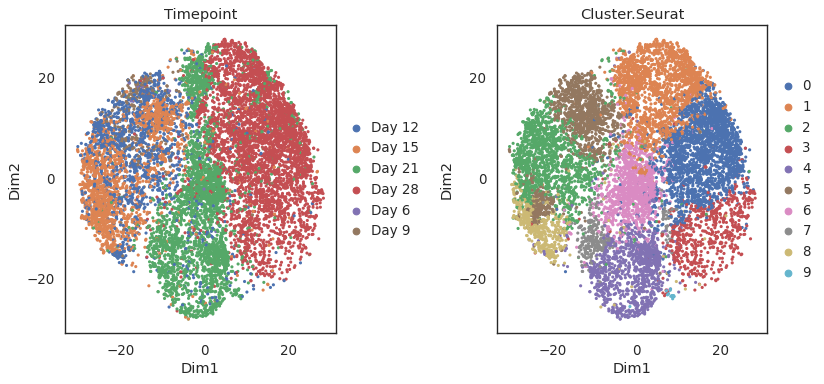

In [19]:
me.pl.scatter(adata_subset, 
              color=['Timepoint','Cluster.Seurat'],
              drawing_order='random',
              obsm='X_tsne_paper')

In [20]:
me.tl.clone_distance(adata_subset,
                     method='geodesic',
                     obsm='X_tsne_paper',
                     anno_time='Day',
                     n_jobs=20)

Finished: 0.28964590628941855 mins


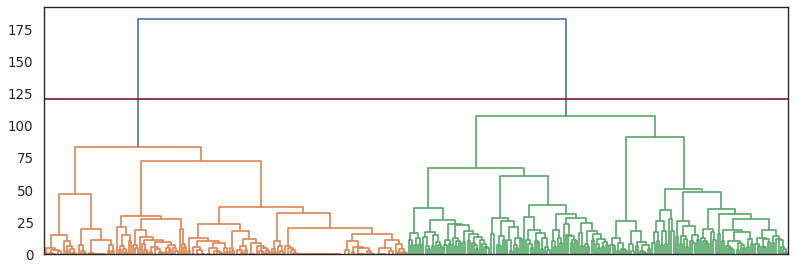

In [21]:
me.pl.clone_dendrogram(adata_subset, color_threshold=120)

In [22]:
me.tl.cluster_clones(adata_subset,
                     n_clusters=3,
                     method='hierarchical')

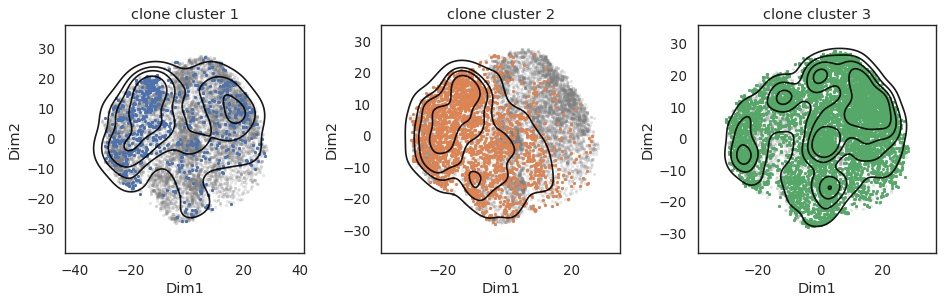

In [23]:
me.pl.clone_clusters(adata_subset, group='hierarchical', obsm='X_tsne_paper',
                     show_contour=True, 
                     levels=5, thresh=0.1,fig_ncol=3, alpha=1)

In [41]:
me.tl.build_graph(adata_subset, obsm='X_tsne_paper', n_clusters=20)

graph already built, using previous (set force=True to clobber)


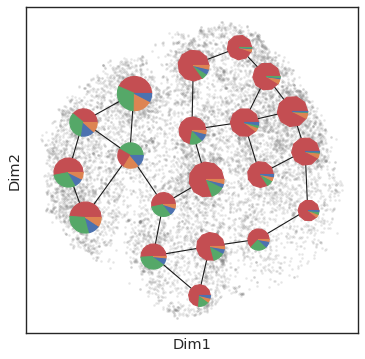

In [42]:
me.pl.cluster_pie_graph(adata_subset, obsm='X_tsne_paper')

graph already built, using previous (set force=True to clobber)


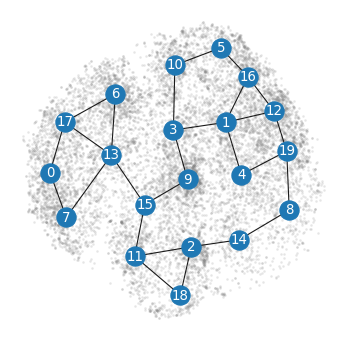

In [43]:
me.pl.cluster_graph(adata_subset, obsm='X_tsne_paper')

In [46]:
roots=[6,17,0,13,7]
me.tl.calculate_pseudotime(adata_subset, roots=roots)

HF1.AGCGGTCAGAGTTGGC-4    5
HF1.ATTTCTGCATGCCCGA-4    4
HF1.CTCTACGTCCACGCAG-4    5
HF1.CTGCCTAGTTCGGGCT-4    0
HF1.GTTTCTAGTTCCTCCA-4    3
                         ..
HF2.TGTCCCAAGTCTTGCA-8    6
HF2.TTCGGTCAGAGTAATC-8    6
HF2.TTCTCCTCAACTGCTA-8    5
HF2.TTGGCAAAGGCTCAGA-8    6
HF2.TTTGCGCCATACAGCT-8    5
Name: pseudotime, Length: 12346, dtype: int64

In [ ]:
me.tl.differential_test_vars(adata_subset, ['1'], ['2'], n_jobs=12)

In [52]:
adata_subset.uns['wilcoxon_MEGATRON']

,coef,p_value,gene,p_value_corr
22893,-2.036765,8.627738e-42,ENSMUSG00000006356,2.415853e-37
1829,-0.712799,4.339095e-40,ENSMUSG00000026748,6.074950e-36
15866,0.826209,1.809316e-36,ENSMUSG00000031849,1.688755e-32
11335,-4.293664,5.692812e-34,ENSMUSG00000000184,3.985111e-30
304,-1.175601,1.930214e-31,ENSMUSG00000045954,1.080959e-27
...,...,...,...,...
2664,0.000000,1.000000e+00,ENSMUSG00000044487,1.000000e+00
2663,0.000000,1.000000e+00,ENSMUSG00000075158,1.000000e+00
20444,0.000000,1.000000e+00,ENSMUSG00000001444,1.000000e+00
2667,0.000000,1.000000e+00,ENSMUSG00000070855,1.000000e+00


In [49]:
top_genes=adata_subset.uns['wilcoxon_MEGATRON'].head(6)['gene']

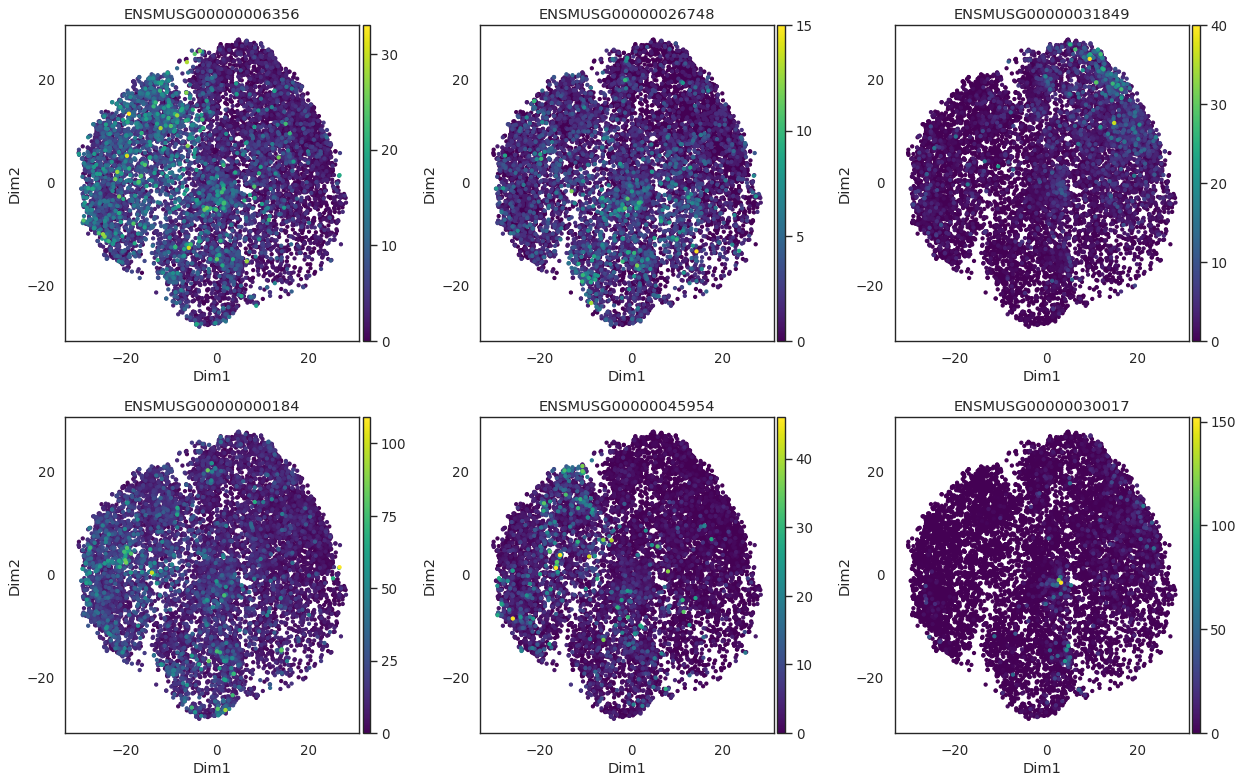

In [54]:
me.pl.scatter(adata_subset, color=top_genes, obsm='X_tsne_paper')

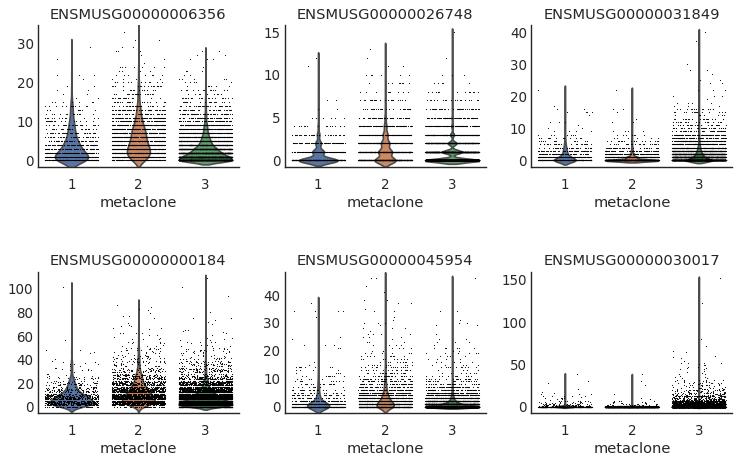

In [50]:
me.pl.metaclone_violin(adata_subset, top_genes)

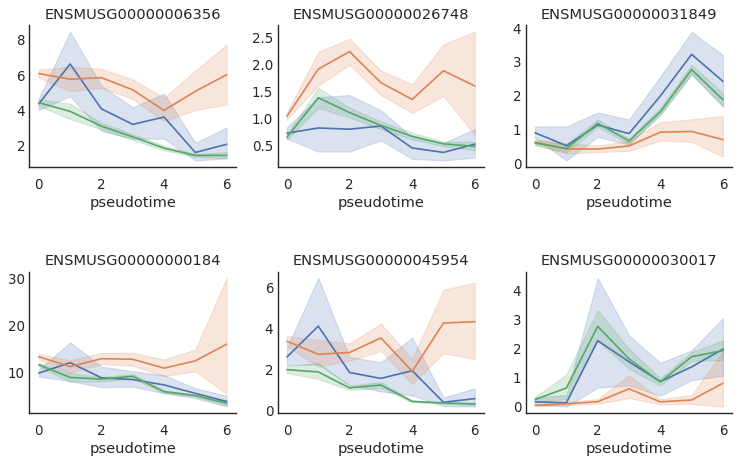

In [55]:
me.pl.metaclone_lineplot(adata_subset, top_genes)

In [24]:
adata_subset.uns['clone']['anno']

,hierarchical
364,3
373,2
375,2
376,3
384,2
...,...
1732,3
1765,2
1787,3
1804,2


In [25]:
adata_subset.uns['clone']['anno'][adata_subset.uns['clone']['anno']['hierarchical']=='1']

,hierarchical
396,1
403,1
584,1
637,1
638,1
...,...
1554,1
1599,1
1607,1
1683,1


/srv/local/logan/MEGATRON/megatron/plotting/_plot.py:569: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sc_i = sns.scatterplot(ax=ax_i,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


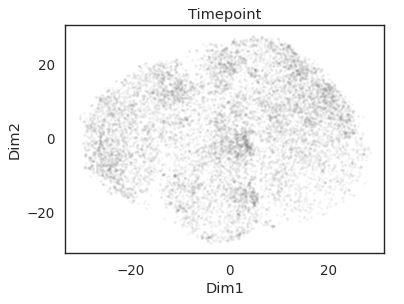

In [26]:
me.pl.clones(adata_subset, 
             ids=['99'], 
             obsm='X_tsne_paper', 
             color=['Timepoint'],
             bg_alpha=0.1,
             fig_size=(5,4),
             show_contour=False)

/srv/local/logan/MEGATRON/megatron/plotting/_plot.py:569: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sc_i = sns.scatterplot(ax=ax_i,
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


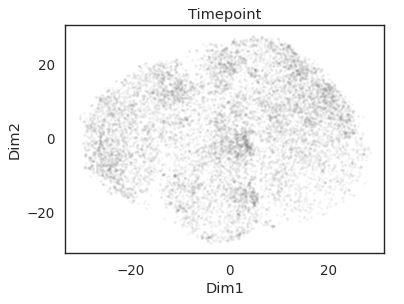

In [27]:
me.pl.clones(adata_subset, 
             ids=['5'], 
             obsm='X_tsne_paper', 
             color=['Timepoint'],
             bg_alpha=0.1,
             fig_size=(5,4),
             show_contour=False)

In [28]:
adata.write('./result_celltagging/adata_celltag.h5ad')
adata_subset.write('./result_celltagging/adata_subset_celltag.h5ad')

/PHShome/ljb80/ssd/logan/mambaforge/envs/logan_MEGATRON/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Cluster.Seurat' as categorical
/PHShome/ljb80/ssd/logan/mambaforge/envs/logan_MEGATRON/lib/python3.9/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Cluster.Seurat' as categorical
